In [1]:
# Load dependencies
import pandas as pd
import numpy as np
from scipy.stats import gmean
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.insert(0, '../statistics_helper/')
from CI_helper import *
from excel_utils import *

# Quantifying the probability of plant biomass being higher than bacterial biomass
In order to quantify the probability of plants having more biomass than bacteria, we randomly sample from the distribution of our estimates for the biomass of plants and bacteria.

In [2]:
# Load results
results = pd.read_excel('../results.xlsx','Table1 & Fig1',index_col=[0,1])

# Sample 100000 times from the distribution of our estimates for the biomass of plants and bacteria
sample_size = 100000

# Load the results for the biomass of bacteria
means = results.loc['Bacteria','Biomass [Gt C]']
mul_CIs = results.loc['Bacteria','Uncertainty']

# Define the function sampling from the distribution of estimates on the biomass of each taxon
sample = lambda x,y: np.random.lognormal(mean = np.log(x), sigma = np.log(y)/1.96,size=sample_size).reshape([-1,1])    

# Sample from the distribution of each group of bacteria
bacteria_dist = np.empty([sample_size,4])
for x,ind in enumerate(means.index):
    bacteria_dist[:,x:x+1] = sample(means.loc[ind],mul_CIs.loc[ind])

# Sum over all groups of bacteria
bac_sum = bacteria_dist.sum(axis=1)

# Sample from the distribution of estimates of the biomass of plants
plants = sample(results.loc[('Plants','Plants'),'Biomass [Gt C]'],results.loc[('Plants','Plants'),'Total uncertainty'])


# Calculate the probability of plant biomass being higher than that of bacteria
p_val = (plants[:,0] > bac_sum).sum()/sample_size

print('The probability of plants having more biomass than bacteria is ≈%.2f' %(p_val*100) + '%')

The probability of plants having more biomass than bacteria is ≈90.03%


[]

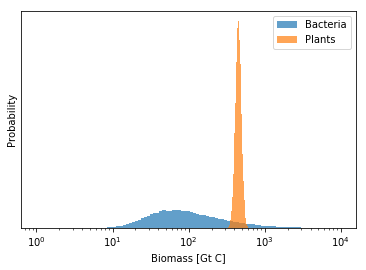

In [3]:
# Plot the distributions    
bins = 10**(np.linspace(0,4,1000))
weights = np.ones(sample_size)/sample_size

bins2 = 10**(np.linspace(0,4,100))
weights2 = np.ones(sample_size)/sample_size/10

axes = plt.hist(bac_sum,bins=bins2,weights=weights2,alpha=0.7)

r = plt.hist(plants[:,0],bins=bins,weights=weights,alpha=0.7)
plt.legend(['Bacteria', 'Plants'])
plt.xscale('log')
plt.xlabel('Biomass [Gt C]')
plt.ylabel('Probability')
plt.gca().set_yticks([])
#plt.savefig('Figure.png',dpi=300)